In [2]:
import pandas as pd                                          #Importing some libraries
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway, ttest_ind

In [4]:
crop=pd.read_csv('crop.xls')               #Reading csv file

Suitable crop selection for environmental parameter! 


In [3]:
crop.head(3)       #let have overlook on data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


Let's understand the dataset and assumptions, Considering the N,P,K as nitrogen,phosphorus and potassium and the values suppose to be the composition in soil , temprature will suppose to be average temprature required for crop,humidity,ph must be value for soil,rainfall is must be in mm and which crop is suitable for this condition is in label column.

Lets move on to some EDA

In [5]:
crop.info()                        # Seems there is nonull value , and data type is also apropriate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
list_of_crop=crop['label'].unique()
list_of_crop

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
crop.describe().T   

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [8]:
corr=crop.drop(['label'],axis=1).corr()      #Let's Check the corrleation between columns
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [9]:
crop['label'].value_counts()  # data is accurrately balnced 

apple          100
mothbeans      100
orange         100
lentil         100
rice           100
coffee         100
banana         100
cotton         100
coconut        100
jute           100
chickpea       100
grapes         100
kidneybeans    100
muskmelon      100
watermelon     100
mungbean       100
maize          100
papaya         100
pomegranate    100
mango          100
pigeonpeas     100
blackgram      100
Name: label, dtype: int64

In [10]:
crop.duplicated().sum()  # No duplicates in the data set

0

<AxesSubplot:>

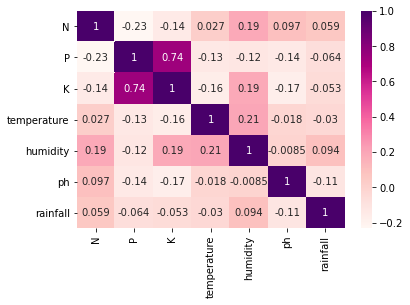

In [7]:
sns.heatmap(corr,annot=True,cbar=True,cmap='RdPu')

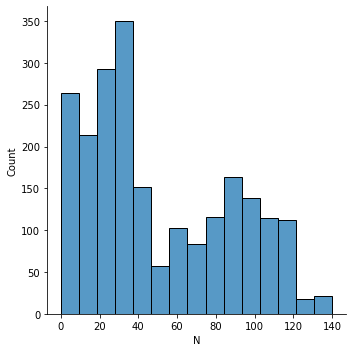

In [11]:
sns.displot(crop['N'])


<Axes: xlabel='P', ylabel='Count'>

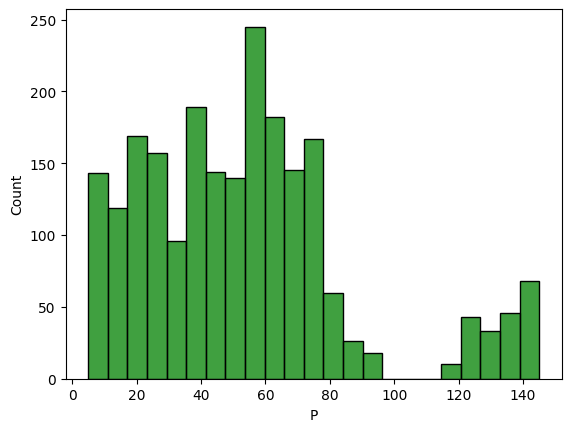

In [13]:
sns.histplot(crop['P'],color='Green')

<Axes: xlabel='K', ylabel='Count'>

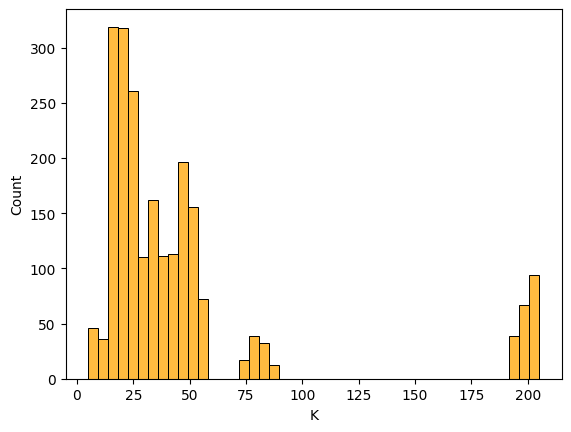

In [14]:
sns.histplot(crop
             ['K'],color='Orange')

<Axes: xlabel='temperature', ylabel='Count'>

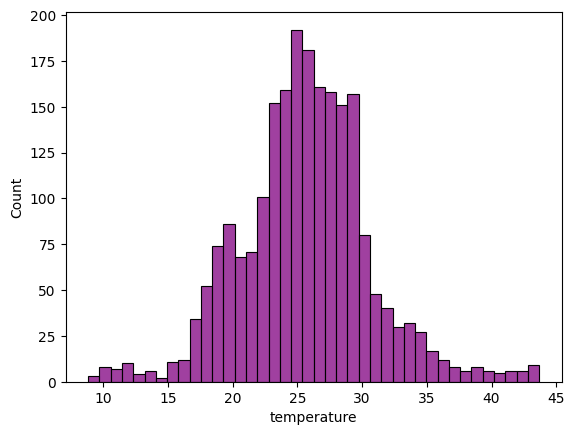

In [15]:
sns.histplot(crop['temperature'],color='Purple')

<Axes: xlabel='humidity', ylabel='Count'>

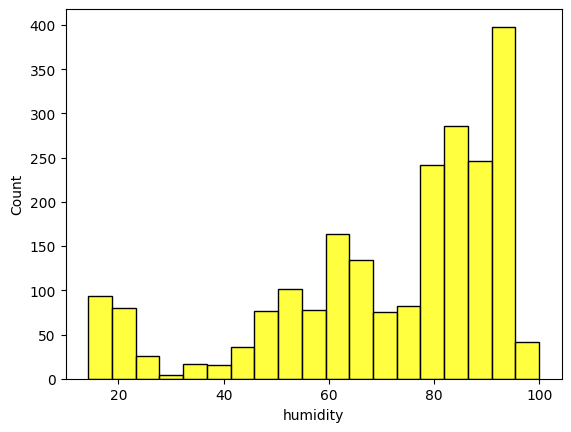

In [16]:
sns.histplot(crop['humidity'],color='Yellow')

<Axes: xlabel='ph', ylabel='Count'>

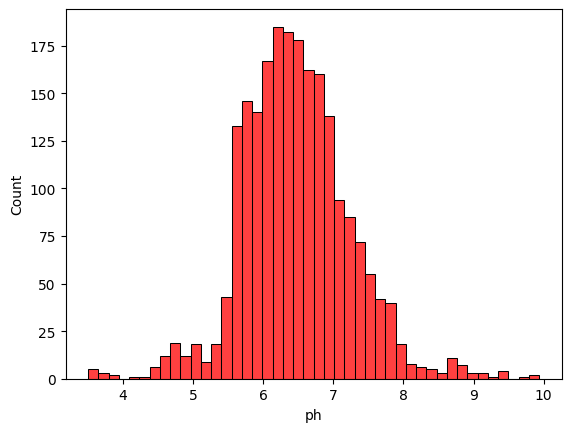

In [17]:
sns.histplot(crop['ph'],color='Red')

<Axes: xlabel='rainfall', ylabel='Count'>

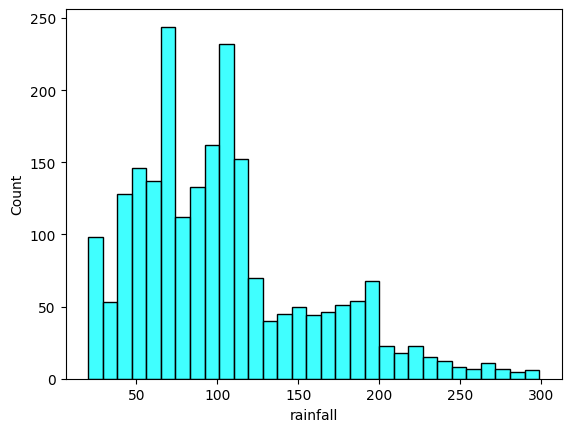

In [18]:
sns.histplot(crop['rainfall'],color='Cyan')

#### Conducting stastical  tests to determine if there are significant difference in enviromental parameters across diff. crop labels

In [12]:
# ANOVA test
def perform_anova(data, feature, target):
    groups = []
    for label, group in data.groupby(target):
        groups.append(group[feature])
    f_statistic, p_value = f_oneway(*groups)
    return f_statistic, p_value

# T-test
def perform_t_test(data, feature, target, group1, group2):
    group1_data = data[data[target] == group1][feature]
    group2_data = data[data[target] == group2][feature]
    t_statistic, p_value = ttest_ind(group1_data, group2_data)
    return t_statistic, p_value

# Example usage
# Assuming 'df' is your DataFrame and 'label' column contains the crop labels
# Here, we'll perform ANOVA and t-test for 'Potassium ratio' with 'label'

# ANOVA test
f_stat, p_val_anova = perform_anova(crop, 'N' ,'label')
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_val_anova)

# T-test
group1 = 'rice'
group2 = 'maize'
t_stat, p_val_ttest = perform_t_test(crop,'N', 'label', group1, group2)
print("T-test statistic:", t_stat)
print("T-test p-value:", p_val_ttest)

ANOVA F-statistic: 897.568186325714
ANOVA p-value: 0.0
T-test statistic: 1.2620827085094508
T-test p-value: 0.20840363213625698


we can see there is significant difference in nitrogen ratio between rice and maize crops,they may not be large enough to be considered stastically significant in this perticular analysis. we can do similar kind of analysis.

#### Converting catagorial variables to integer formate

In [13]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [14]:
crop=crop.drop('label',axis=1) # droping label column

In [15]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


### Training testing and spliting dataset

In [16]:
X=crop.drop('crop_num',axis=1)
Y=crop['crop_num']

In [17]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train.shape

(1760, 7)

In [22]:
X_test.shape

(440, 7)

In [23]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


#### Model Building

Importing all the classification models



Creating an Instance for building all models at once

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")

Logistic Regression  with accuracy : 0.9454545454545454
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9613636363636363
K-Nearest Neighbors  with accuracy : 0.9704545454545455
Decision Tree  with accuracy : 0.9863636363636363
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9840909090909091
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9136363636363637


In [25]:
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)

In [26]:
accuracy_score(Y_test,ypred)*100

99.31818181818181

In [27]:
ypred.shape

(440,)

#### Check weither Model is overfitted or underfitted

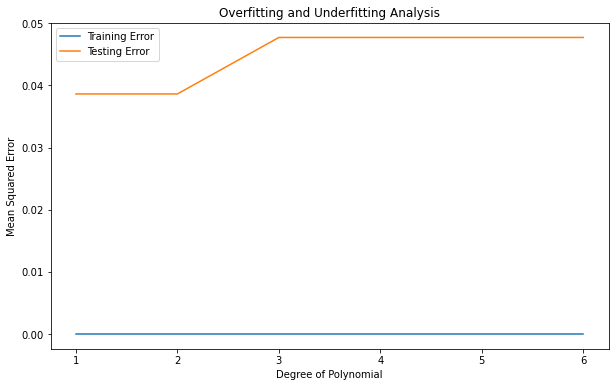

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Function to train and evaluate polynomial regression models of varying degrees
def fit_polynomial(X_train, Y_train, X_test, Y_test, degrees):
    train_errors = []
    test_errors = []
    for degree in degrees:
        # Transform features to polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
        
        # Train a linear regression model
        model = RandomForestClassifier()
        model.fit(X_train_poly, Y_train)
        
        # Calculate training and testing errors
        train_pred = model.predict(X_train_poly)
        test_pred = model.predict(X_test_poly)
        train_error = mean_squared_error(Y_train, train_pred)
        test_error = mean_squared_error(Y_test, test_pred)
        train_errors.append(train_error)
        test_errors.append(test_error)
        
    return train_errors, test_errors

# Define the degrees of polynomial regression models to try
degrees = [1, 2, 3, 4, 5, 6]

# Fit polynomial regression models and calculate errors
train_errors, test_errors = fit_polynomial(X_train, Y_train, X_test, Y_test, degrees)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Overfitting and Underfitting Analysis')
plt.legend()
plt.show()

#### Model is overfitted so we apply some Ridge and lasso regression , we can also do feature selectionn and cross validation

Applying Ridge and lasso

In [29]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

# Polynomial feature transformation
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Ridge (L2 regularization)
alpha_ridge = 0.15  # Regularization strength
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train_poly, Y_train)

# Lasso (L1 regularization)
alpha_lasso = 0.15  # Regularization strength
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train_poly, Y_train)

# Predictions
ridge_train_pred = ridge_model.predict(X_train_poly)
ridge_test_pred = ridge_model.predict(X_test_poly)
lasso_train_pred = lasso_model.predict(X_train_poly)
lasso_test_pred = lasso_model.predict(X_test_poly)

# Calculate errors
ridge_train_error = mean_squared_error(Y_train, ridge_train_pred)
ridge_test_error = mean_squared_error(Y_test, ridge_test_pred)
lasso_train_error = mean_squared_error(Y_train, lasso_train_pred)
lasso_test_error = mean_squared_error(Y_test, lasso_test_pred)

print("Ridge Training Error:", ridge_train_error)
print("Ridge Testing Error:", ridge_test_error)
print("Lasso Training Error:", lasso_train_error)
print("Lasso Testing Error:", lasso_test_error)

Ridge Training Error: 1.9195225569071506
Ridge Testing Error: 3.24693678054289
Lasso Training Error: 4.56159818839037
Lasso Testing Error: 5.453660159252511


### Getting ROC AUC curve for multiclass classification

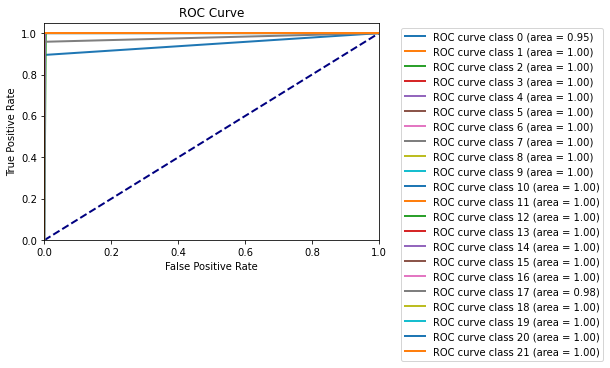

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


n_classes=len(np.unique(Y_test))
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
y_pred_bin = label_binarize(ypred, classes=np.unique(Y_test))


# Generate ROC curve and calculate AUC for multiclass classification
if n_classes > 2:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class %d (area = %0.2f)' % (i, roc_auc[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    # Position the legend outside the plot and adjust its position
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()

#### Let's test the model with random input

In [31]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = classifier.predict(features).reshape(1,-1)
    
    return prediction[0] 

In [36]:
#INPUT BLOCK..................
N = 112
P = 88
k = 33
temperature = 44.0
humidity = 88
ph = 7.5
rainfall = 10
#INPUT BLOCK
predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")
    
    
warnings.filterwarnings('ignore')

Muskmelon is a best crop to be cultivated 
